c:\Users\dlehr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


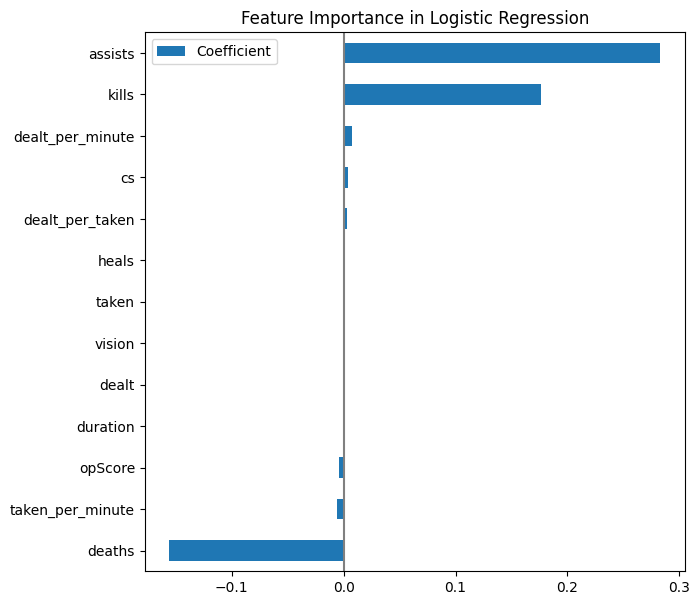

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np  # For handling inf values

# 데이터 로드
mid_df = pd.read_json('midDataFrame.json', encoding='utf-8-sig')

# Correcting variable references and calculating new features
mid_df['dealt_per_taken'] = mid_df['dealt'] / mid_df['taken']
mid_df['dealt_per_minute'] = mid_df['dealt'] / mid_df['duration'] * 60
mid_df['taken_per_minute'] = mid_df['taken'] / mid_df['duration'] * 60

# Handling NaN and infinite values
mid_df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
mid_df.dropna(inplace=True)  # Drop rows with any NaN values

# 특성과 타겟 변수 분리
X = mid_df[['kills', 'deaths', 'assists', 'dealt', 'taken', 'heals', 'cs', 
            'vision', 'duration', 'opScore', 'dealt_per_taken', 'dealt_per_minute', 'taken_per_minute']]
y = mid_df['win']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 계수 시각화
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=True, inplace=True)
coefficients.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Importance in Logistic Regression')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()

Accuracy: 0.7639
Precision: 0.7738
Recall: 0.7548
F1 Score: 0.7642


c:\Users\dlehr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


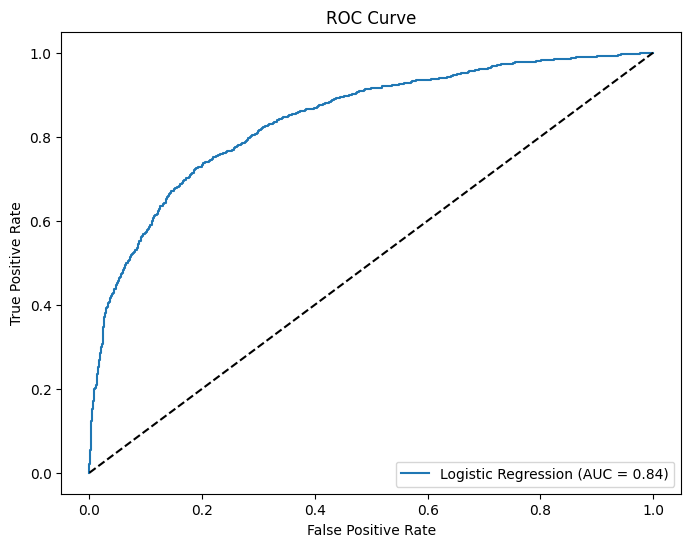

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
mid_df = pd.read_json('midDataFrame.json', encoding='utf-8-sig')

# Correcting variable references and calculating new features
mid_df['dealt_per_taken'] = mid_df['dealt'] / mid_df['taken']
mid_df['dealt_per_minute'] = mid_df['dealt'] / mid_df['duration'] * 60
mid_df['taken_per_minute'] = mid_df['taken'] / mid_df['duration'] * 60

# Handling NaN and infinite values
mid_df.replace([np.inf, -np.inf], np.nan, inplace=True)
mid_df.dropna(inplace=True)

# 특성과 타겟 변수 분리
X = mid_df[['kills', 'deaths', 'assists', 'dealt', 'taken', 'heals', 'cs', 
            'vision', 'duration', 'opScore', 'dealt_per_taken', 'dealt_per_minute', 'taken_per_minute']]
y = mid_df['win']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LogisticRegression(max_iter=1000)  # max_iter may need to be increased if convergence warning appears
model.fit(X_train, y_train)

# 예측 확률 계산
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# 예측 수행
y_pred = model.predict(X_test)

# 정확도, 정밀도, 재현율, F1 점수 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.6878
Precision: 0.6955
Recall: 0.6831
F1 Score: 0.6892


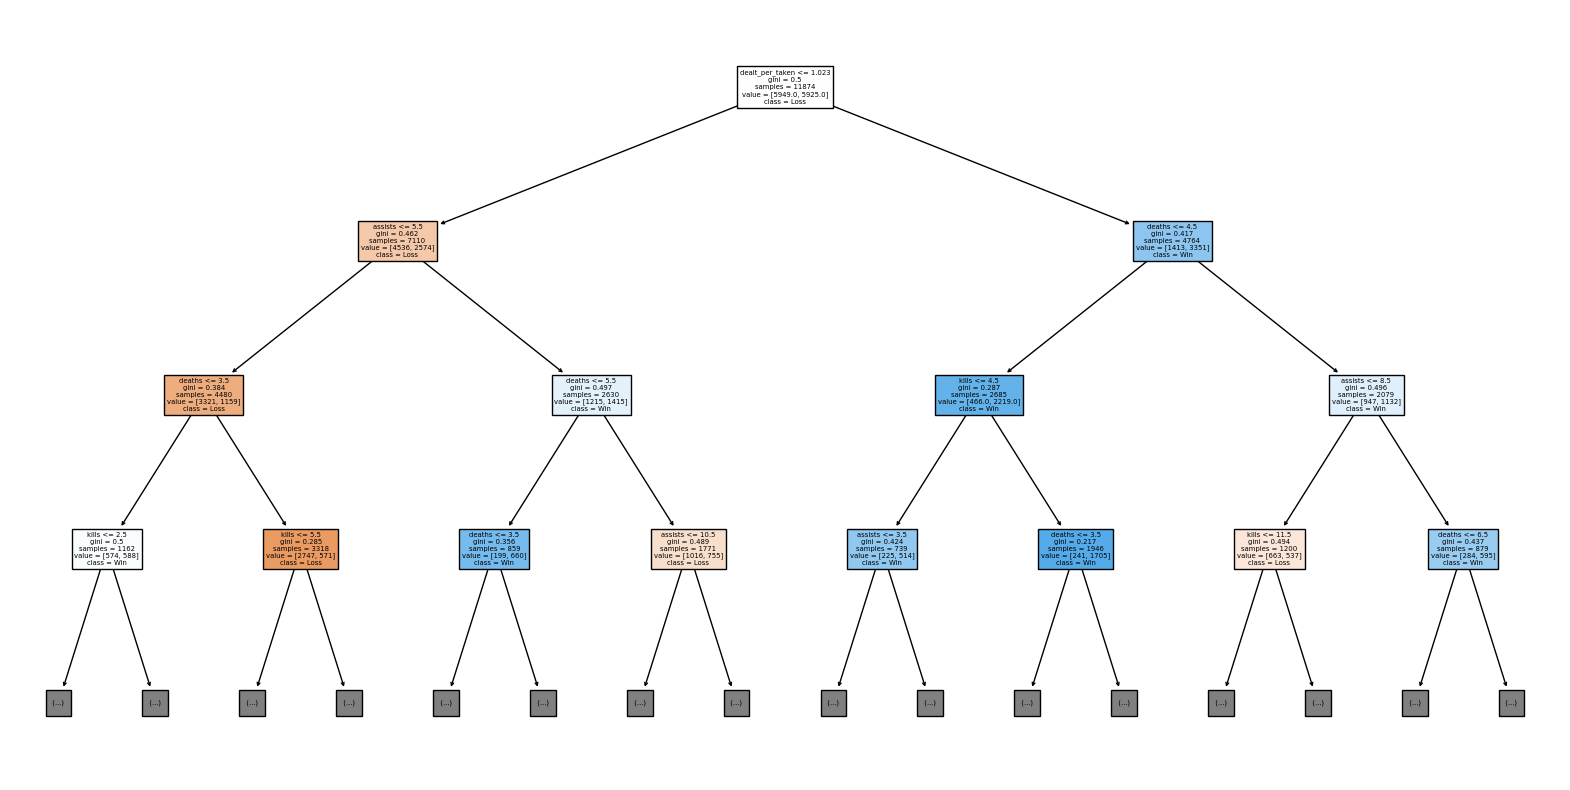

In [5]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습 (결정 트리 사용)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 확률 계산 (결정 트리는 predict_proba 메소드를 제공하지만, 확률이 아닌 클래스 레이블을 직접 예측하는 경우가 많음)
# y_prob = model.predict_proba(X_test)[:, 1]  # 결정 트리에서는 이 코드 대신 아래 코드를 사용
y_pred = model.predict(X_test)  # 클래스 레이블 직접 예측

# ROC Curve 계산을 위한 확률 예측은 결정 트리에서 직접적으로 제공되지 않으므로, 이 부분은 생략
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# auc_score = roc_auc_score(y_test, y_prob)

# 정확도, 정밀도, 재현율, F1 점수 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# 결정 트리의 경우, ROC Curve 대신 트리 구조를 시각화하는 것이 더 일반적임
# ROC Curve 시각화 코드는 제거하고, 대신 트리 구조를 시각화하는 코드를 추가할 수 있음
# 예를 들어, 다음과 같이 트리를 시각화할 수 있음 (이 코드는 실행 환경에 따라 추가 설정이 필요할 수 있음)
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Loss', 'Win'], max_depth=3)
plt.show()

Accuracy: 0.7686
Precision: 0.7745
Recall: 0.7668
F1 Score: 0.7706


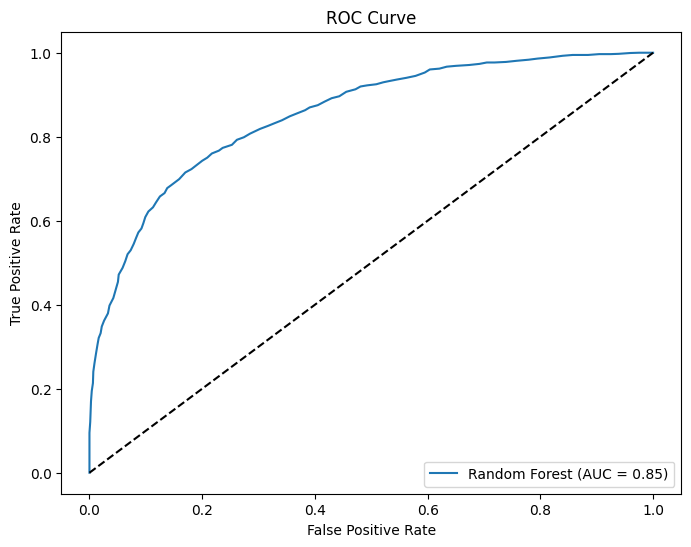

In [6]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습 (랜덤 포레스트 사용)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 확률 계산
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# 예측 수행
y_pred = model.predict(X_test)

# 정확도, 정밀도, 재현율, F1 점수 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.7669
Precision: 0.7712
Recall: 0.7681
F1 Score: 0.7696


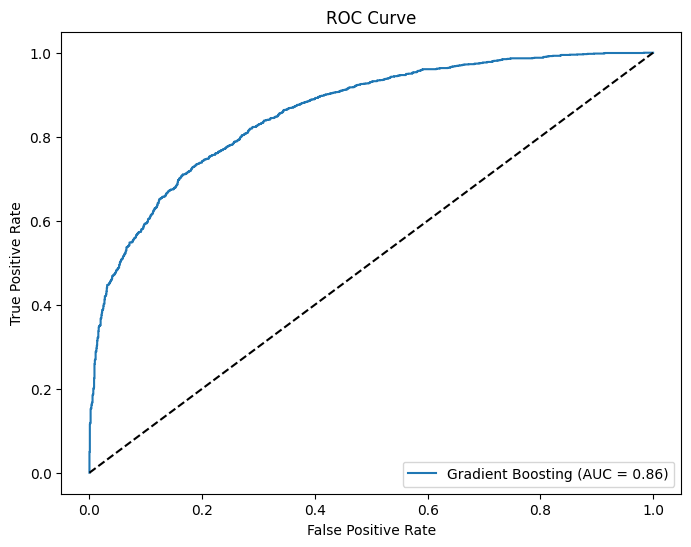

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# 모델 학습 (그래디언트 부스팅 사용)
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 확률 계산
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# 예측 수행
y_pred = model.predict(X_test)

# 정확도, 정밀도, 재현율, F1 점수 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.7039
Precision: 0.7135
Recall: 0.6950
F1 Score: 0.7041


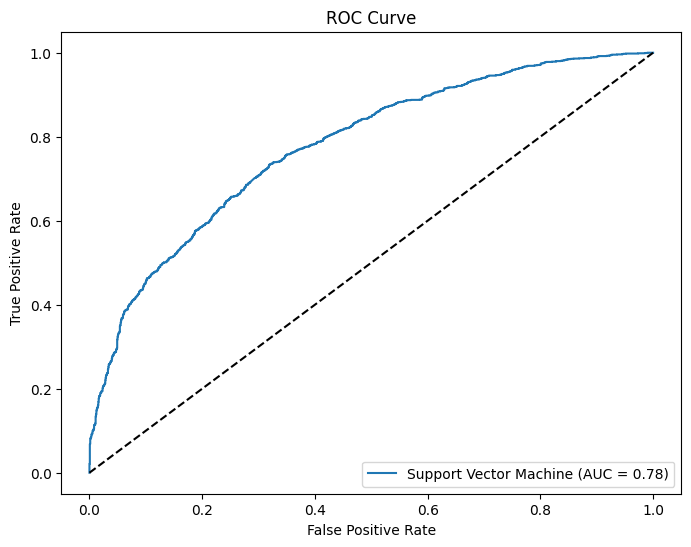

In [8]:
from sklearn.svm import SVC

# 모델 학습 (서포트 벡터 머신 사용, 확률 추정을 위해 probability=True 설정)
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# 예측 확률 계산
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# 예측 수행
y_pred = model.predict(X_test)

# 정확도, 정밀도, 재현율, F1 점수 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Support Vector Machine (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 학습 (K-최근접 이웃 사용)
model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors는 조정 가능
model.fit(X_train, y_train)

# 예측 확률 계산 (KNN은 기본적으로 확률을 제공하지 않으므로 predict_proba 사용 불가)
# 대신 클래스를 직접 예측
y_pred = model.predict(X_test)

# 정확도, 정밀도, 재현율, F1 점수 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# KNN은 기본적으로 확률을 제공하지 않기 때문에 ROC Curve를 그리는 것은 적합하지 않음

Accuracy: 0.6854
Precision: 0.6917
Recall: 0.6844
F1 Score: 0.6880


Accuracy: 0.6295
Precision: 0.5826
Recall: 0.9495
F1 Score: 0.7221


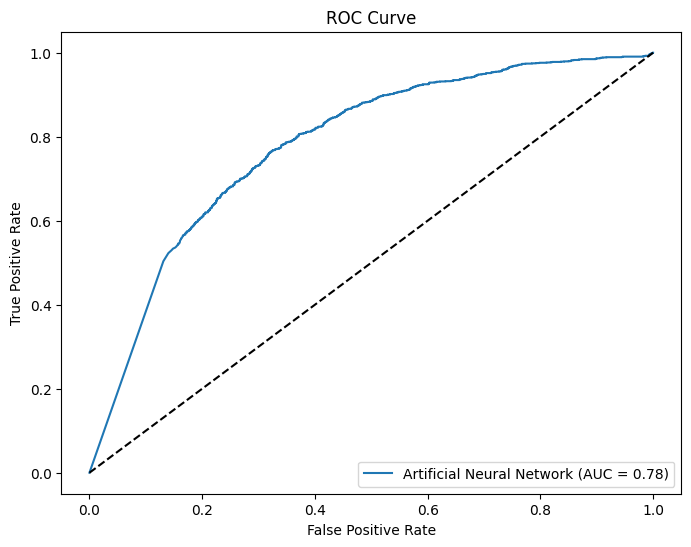

In [10]:
from sklearn.neural_network import MLPClassifier

# 모델 학습 (인공 신경망 사용)
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 예측 확률 계산
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# 예측 수행
y_pred = model.predict(X_test)

# 정확도, 정밀도, 재현율, F1 점수 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Artificial Neural Network (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()